# Cadquery + dotbimpy example

In [1]:
from dotbimpy import *
import cadquery
import uuid

In [2]:
def cadquery_mesh_to_dotbim_mesh(cadquery_mesh, mesh_id):
    vertices, triangles = cadquery_mesh
    coordinates = []
    for i in vertices:
        coordinates.extend([i.x, i.y, i.z])
    indices = [item for sublist in triangles for item in sublist]
    return Mesh(mesh_id=mesh_id, coordinates=coordinates, indices=indices)

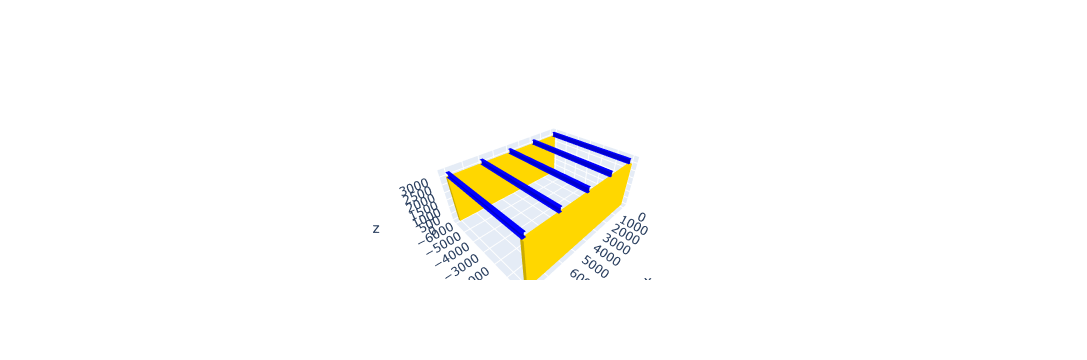

In [4]:
meshes = []
elements = []

(L,H,W,t) = (6000, 300, 200, 10)
pts = [(0,H/2.0),(W/2.0,H/2.0),(W/2.0,(H/2.0 - t)),(t/2.0,(H/2.0-t)),(t/2.0,(t - H/2.0)),(W/2.0,(t -H/2.0)),(W/2.0,H/-2.0),(0,H/-2.0)]
beam_workplane = cadquery.Workplane("XZ").polyline(pts).mirrorY().extrude(L)
beam_mesh_cq = beam_workplane.val().tessellate(0.1)
meshes.append(cadquery_mesh_to_dotbim_mesh(beam_mesh_cq, 0))

(number_of_beams,spacing,wall_height) = (5,2000,3000)
for i in range(number_of_beams):
    elements.append(Element(mesh_id=0,
                    vector=Vector(x=i*spacing, y=0, z=wall_height+H/2),
                    guid=str(uuid.uuid4()),
                    info={"Material": "Steel"},
                    rotation=Rotation(qx=0, qy=0, qz=0, qw=1.0),
                    type="Beam",
                    color=Color(r=0, g=0, b=255, a=255)))

wall_workplane = cadquery.Workplane("front").moveTo((spacing*(number_of_beams-1))/2.0,0).box(spacing*(number_of_beams-1)+W, 200.0, wall_height)
wall_mesh_cq = wall_workplane.val().tessellate(0.1)
meshes.append(cadquery_mesh_to_dotbim_mesh(wall_mesh_cq, 1))

for i in range(2):
    elements.append(Element(mesh_id=1,
                    vector=Vector(x=0, y=-i*L, z=wall_height/2.0),
                    guid=str(uuid.uuid4()),
                    info={"Material": "Concrete"},
                    rotation=Rotation(qx=0, qy=0, qz=0, qw=1.0),
                    type="Wall",
                    color=Color(r=255, g=215, b=0, a=255)))


file_info = {"Author": "John Doe"}
file = File("1.0.0", meshes=meshes, elements=elements, info=file_info)
file.view()
file.save("WallsWithBeams.bim")